<a href="https://colab.research.google.com/github/sophie55555/AIFFEL_quest_crAIFFEL_quest_cr/blob/main/disney_dataton(%EC%B5%9C%EC%A2%85)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

# 파일 로드
file_path = '/content/drive/MyDrive/data/disney_plus_titles.csv'  # 파일 경로를 지정하세요.
data = pd.read_csv(file_path)

# 제거할 열 목록 지정
columns_to_drop = ['show_id', 'date_added', 'title', 'description']  # 삭제할 열 이름을 리스트로 입력하세요.

# 열 삭제
clean_disney = data.drop(columns=columns_to_drop)

# 결과 확인
print(clean_disney.head())

# 수정된 파일 저장
output_path = 'disney_plus_titles.csv'  # 저장할 파일 이름을 지정하세요.
clean_disney.to_csv(output_path, index=False)

print(f"파일이 저장되었습니다: {output_path}")

      type                           director  \
0    Movie  Alonso Ramirez Ramos, Dave Wasson   
1    Movie                        John Cherry   
2    Movie                       Karen Disher   
3    Movie                    Hamish Hamilton   
4  TV Show                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   

   release_year rating  duration                      listed_in  
0          2016   TV-G    23 min              Animation, Family  
1          1988     PG    91 min                         Comedy  
2          2011   TV-G    23 min      Animation, Comedy, Family  
3          202

In [ ]:
clean_disney.head()

,type,director,cast,country,release_year,rating,duration,listed_in
0,Movie,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2016,TV-G,23 min,"Animation, Family"
1,Movie,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,1988,PG,91 min,Comedy
2,Movie,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2011,TV-G,23 min,"Animation, Comedy, Family"
3,Movie,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021,TV-PG,41 min,Musical
4,TV Show,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021,NaN,1 Season,"Docuseries, Historical, Music"


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

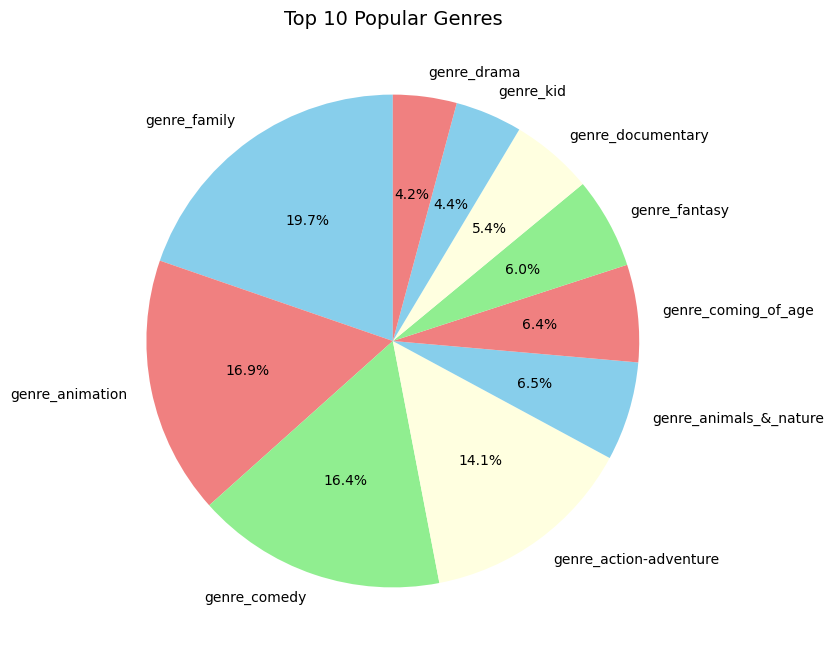

파일이 저장되었습니다: clean_disney.csv


In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import difflib
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt


# 3. WordNetLemmatizer 초기화
lemmatizer = WordNetLemmatizer()

# 4. 유사한 장르를 그룹화하는 함수 정의
def group_similar_genres(genres, threshold=0.8):
    unique_genres = list(set(genres))
    grouped_genres = {}

    for genre in unique_genres:
        genre_singular = lemmatizer.lemmatize(genre.lower())
        matched = False
        for key in grouped_genres:
            similarity = difflib.SequenceMatcher(None, genre_singular, key.lower()).ratio()
            if similarity >= threshold:
                grouped_genres[key].append(genre)
                matched = True
                break
        if not matched:
            grouped_genres[genre_singular] = [genre]

    return grouped_genres

# 5. 장르 데이터 전처리
clean_disney['genres'] = clean_disney['listed_in'].apply(lambda x: x.split(', ') if pd.notna(x) else [])

# 6. 모든 장르 추출 및 그룹화
all_genres = [genre for genres in clean_disney['genres'] for genre in genres]
grouped_genres = group_similar_genres(all_genres, threshold=0.8)

# 7. 원핫 인코딩 함수 정의 및 적용
def generate_one_hot_encoding(df, grouped_genres):
    unique_genre_groups = list(grouped_genres.keys())

    for genre_group in unique_genre_groups:
        column_name = f'genre_{genre_group.replace(" ", "_")}'
        df[column_name] = df['genres'].apply(
            lambda x: 1 if any(g.lower() in map(str.lower, grouped_genres[genre_group]) for g in x) else 0
        )

    return df

# 8. 원핫 인코딩 적용
clean_disney_with_one_hot = generate_one_hot_encoding(clean_disney.copy(), grouped_genres)

# 9. 장르별 등장 횟수 계산
genre_counts = clean_disney_with_one_hot[[
    f'genre_{group.replace(" ", "_")}' for group in grouped_genres.keys()
]].sum()

# 10. 상위 10개 장르 추출
top_10_genres = genre_counts.sort_values(ascending=False).head(10)

# 11. 시각화
plt.figure(figsize=(8, 8))
top_10_genres.plot(kind='pie',
                  autopct='%1.1f%%',
                  startangle=90,
                  colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'],
                  legend=False)
plt.title('Top 10 Popular Genres', fontsize=14)
plt.ylabel('')
plt.show()

# 12. 결과 저장
output_path = 'clean_disney.csv'
clean_disney.to_csv(output_path, index=False)
print(f"파일이 저장되었습니다: {output_path}")

In [ ]:
print(clean_disney_with_one_hot.columns)

Index(['type', 'director', 'cast', 'country', 'release_year', 'rating',
       'duration', 'listed_in', 'genres', 'genre_variety', 'genre_movie',
       'genre_biographical', 'genre_reality', 'genre_romance',
       'genre_romantic_comedy', 'genre_docuseries', 'genre_mystery',
       'genre_crime', 'genre_spy/espionage', 'genre_fantasy',
       'genre_anthology', 'genre_animals_&_nature', 'genre_comedy',
       'genre_game_show_/_competition', 'genre_science_fiction',
       'genre_talk_show', 'genre_western', 'genre_travel',
       'genre_coming_of_age', 'genre_historical', 'genre_buddy',
       'genre_action-adventure', 'genre_animation', 'genre_musical',
       'genre_sport', 'genre_police/cop', 'genre_dance', 'genre_disaster',
       'genre_family', 'genre_series', 'genre_documentary', 'genre_superhero',
       'genre_lifestyle', 'genre_drama', 'genre_medical', 'genre_concert_film',
       'genre_thriller', 'genre_parody', 'genre_survival',
       'genre_soap_opera_/_melodrama', 'g

In [ ]:
clean_disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          1450 non-null   object
 1   director      977 non-null    object
 2   cast          1260 non-null   object
 3   country       1231 non-null   object
 4   release_year  1450 non-null   int64 
 5   rating        1447 non-null   object
 6   duration      1450 non-null   object
 7   listed_in     1450 non-null   object
 8   genres        1450 non-null   object
dtypes: int64(1), object(8)
memory usage: 102.1+ KB


장르별 연도별 제작량 집계

In [ ]:
# release_year 열이 리스트로 저장된 경우 해결
if clean_disney_with_one_hot['release_year'].apply(type).eq(list).any():
    clean_disney_with_one_hot['release_year'] = clean_disney_with_one_hot['release_year'].apply(lambda x: x[0] if isinstance(x, list) else x)

# release_year 열을 숫자로 변환
clean_disney_with_one_hot['release_year'] = pd.to_numeric(clean_disney_with_one_hot['release_year'], errors='coerce')

# genres 열이 리스트 타입이라면 문자열로 변환
if clean_disney_with_one_hot['genres'].apply(type).eq(list).any():
    clean_disney_with_one_hot['genres'] = clean_disney_with_one_hot['genres'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# 장르별 연도별 제작량 집계 함수
def genre_year_distribution(df, grouped_genres):
    unique_genre_groups = list(grouped_genres.keys())
    genre_year_counts = {}

    for genre_group in unique_genre_groups:
        # 특정 장르의 데이터 필터링
        genre_data = df[df[f'genre_{genre_group.replace(" ", "_")}'] == 1]

        # 연도별 데이터 집계
        year_counts = genre_data.groupby('release_year').size()
        genre_year_counts[genre_group] = year_counts

    return genre_year_counts

# 장르별 연도별 제작량 집계
genre_year_counts = genre_year_distribution(clean_disney_with_one_hot, grouped_genres)

# movie 장르 삭제
if 'movie' in genre_year_counts:
    del genre_year_counts['movie']

# 결과 확인
print(genre_year_counts)

{'variety': release_year
1955    1
1966    1
1976    1
2008    1
2016    1
2017    1
2018    1
2020    3
2021    2
dtype: int64, 'biographical': release_year
1965    1
1967    1
1972    1
1991    2
1993    1
1994    1
1995    1
1998    1
1999    1
2000    2
2002    2
2005    1
2006    2
2009    1
2010    1
2012    1
2013    1
2015    1
2016    3
2017    2
2019    2
2020    7
2021    5
dtype: int64, 'reality': release_year
2012    1
2013    1
2014    1
2015    3
2016    1
2017    3
2019    6
2020    5
2021    5
dtype: int64, 'romance': release_year
1956    1
1959    1
1961    1
1969    1
1984    1
1990    1
1995    1
1998    2
1999    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2014    1
2020    1
dtype: int64, 'romantic comedy': release_year
1974    1
2009    1
dtype: int64, 'docuseries': release_year
2004     1
2010     1
2011     2
2012     5
2013     4
2014     5
2015     5
2016     9
2017    11
2018    16
2019    22
2020    23
2021    18
dtype:

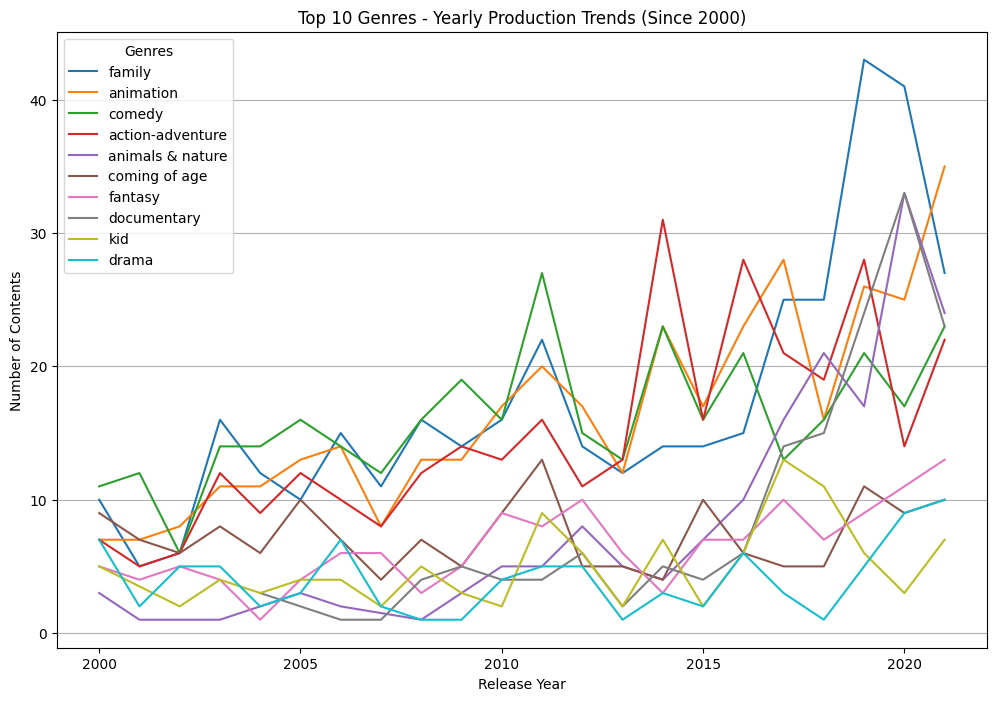

In [ ]:
import matplotlib.pyplot as plt

def plot_genre_trends(genre_year_counts, top_n=10):
    plt.figure(figsize=(12, 8))

    # 상위 인기 장르를 추출
    sorted_genres = sorted(genre_year_counts.keys(),
                         key=lambda x: genre_year_counts[x].sum(),
                         reverse=True)[:top_n]

    # 각 장르에 대해 시각화
    for genre in sorted_genres:
        if not genre_year_counts[genre].empty:
            # 2000년 이후 데이터만 필터링
            genre_data = genre_year_counts[genre][genre_year_counts[genre].index >= 2000]
            genre_data.sort_index().plot(label=genre)

    plt.title(f'Top {top_n} Genres - Yearly Production Trends (Since 2000)')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Contents')
    plt.legend(title='Genres')
    plt.grid(axis='y')
    plt.show()

# 상위 10개 장르 시각화
plot_genre_trends(genre_year_counts, top_n=10)


=== 장르별 성장률 통계 ===
                         장르  총 제작량  평균 연간 성장률  성장률 표준편차  최대 성장률  최소 성장률  \
13          science fiction     68      64.12    208.10  900.00  -80.00   
20                  musical     74      55.83    144.56  500.00  -66.67   
2                   reality     26      52.08    102.13  200.00  -66.67   
29                    drama     89      50.79    133.51  400.00  -80.00   
9                 anthology     24      47.22     45.24  100.00    0.00   
16               historical     45      43.87    117.63  300.00  -66.67   
36                      kid    106      42.14    121.26  350.00  -71.43   
17                    buddy     30      40.00    114.89  400.00  -60.00   
4                docuseries    122      35.25     51.76  150.00  -21.74   
26              documentary    156      34.86     90.16  300.00  -66.67   
27                superhero     19      33.33     97.82  200.00  -50.00   
0                   variety      9      33.33     94.28  200.00  -33.33   
1    

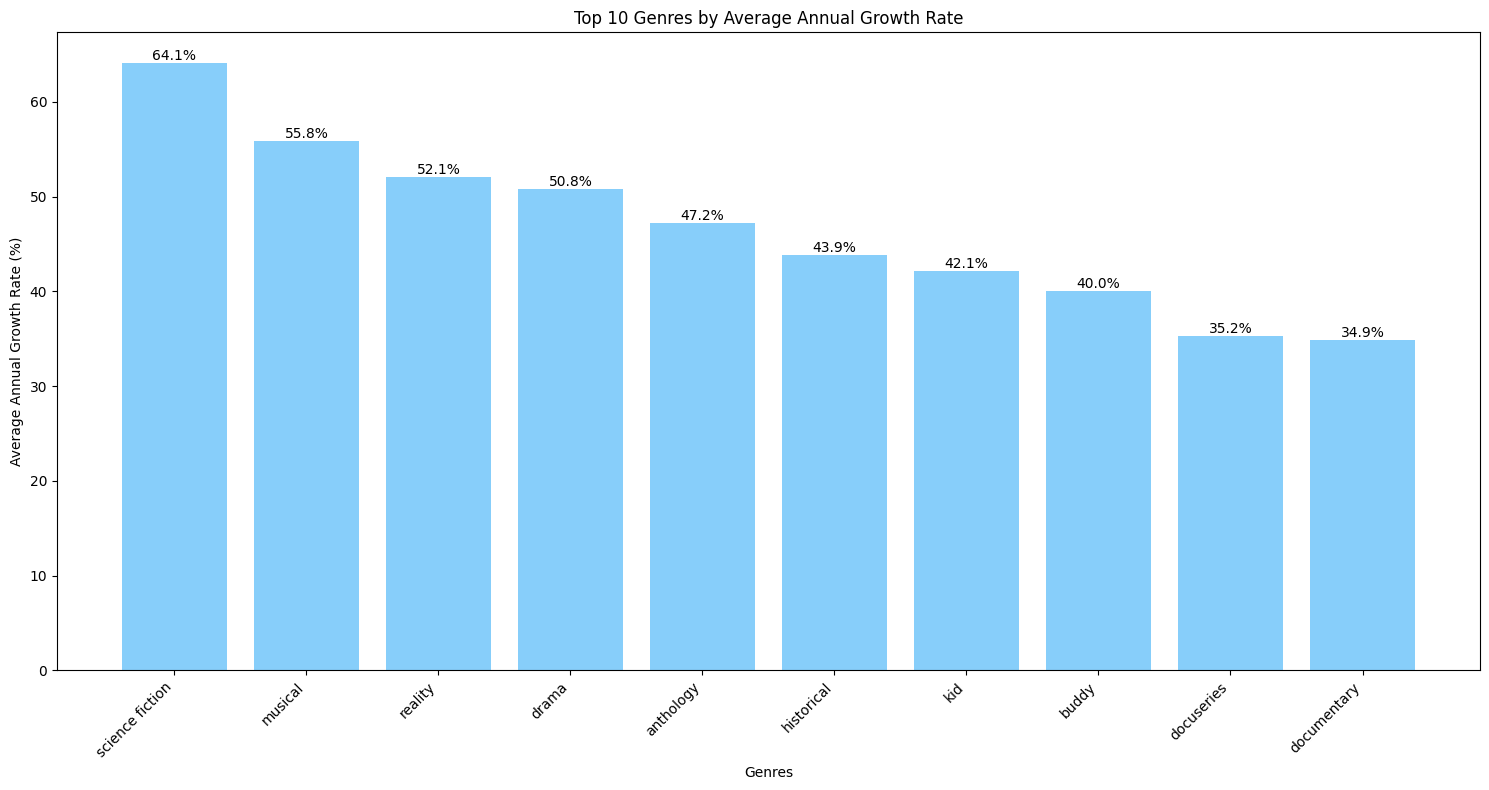


=== 지표간 상관관계 ===
              총 제작량  평균 연간 성장률  최근 5년 평균 성장률  전체 성장률
총 제작량          1.00       0.06          0.00    0.26
평균 연간 성장률      0.06       1.00          0.77    0.51
최근 5년 평균 성장률   0.00       0.77          1.00    0.24
전체 성장률         0.26       0.51          0.24    1.00


In [ ]:
def calculate_genre_growth_stats(genre_year_counts, start_year=2000):
    """
    각 장르별 성장률 통계를 계산하는 함수

    Parameters:
    genre_year_counts (dict): 장르별 연도별 제작량 데이터
    start_year (int): 분석 시작 연도

    Returns:
    pd.DataFrame: 장르별 성장률 통계
    """
    import pandas as pd
    import numpy as np

    growth_stats = []

    for genre, year_counts in genre_year_counts.items():
        # 2000년 이후 데이터만 필터링
        recent_data = year_counts[year_counts.index >= start_year].sort_index()

        if not recent_data.empty and len(recent_data) > 1:
            # 연간 성장률 계산
            yearly_growth = recent_data.pct_change() * 100

            # 통계 계산
            stats = {
                '장르': genre,
                '총 제작량': recent_data.sum(),
                '평균 연간 성장률': yearly_growth.mean(),
                '성장률 표준편차': yearly_growth.std(),
                '최대 성장률': yearly_growth.max(),
                '최소 성장률': yearly_growth.min(),
                '최근 5년 평균 성장률': yearly_growth.tail(5).mean(),
                '시작 연도 제작량': recent_data.iloc[0],
                '마지막 연도 제작량': recent_data.iloc[-1],
                '전체 성장률': ((recent_data.iloc[-1] / recent_data.iloc[0]) - 1) * 100
            }

            growth_stats.append(stats)

    # DataFrame 생성 및 정렬
    growth_df = pd.DataFrame(growth_stats)
    growth_df = growth_df.sort_values('평균 연간 성장률', ascending=False)

    return growth_df

# 성장률 통계 시각화 함수
def plot_growth_statistics(growth_df, top_n=10):
    """
    장르별 성장률 통계를 시각화하는 함수

    Parameters:
    growth_df (pd.DataFrame): 성장률 통계 데이터
    top_n (int): 표시할 상위 장르 수
    """
    plt.figure(figsize=(15, 8))

    # 상위 N개 장르 선택
    top_genres = growth_df.head(top_n)

    # 바 차트 생성
    bars = plt.bar(range(len(top_genres)), top_genres['평균 연간 성장률'], color='lightskyblue')

    # 차트 꾸미기
    plt.title(f'Top {top_n} Genres by Average Annual Growth Rate')
    plt.xlabel('Genres')
    plt.ylabel('Average Annual Growth Rate (%)')
    plt.xticks(range(len(top_genres)), top_genres['장르'], rotation=45, ha='right')

    # 값 레이블 추가
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# 분석 실행
growth_stats = calculate_genre_growth_stats(genre_year_counts)

# 결과 출력
print("\n=== 장르별 성장률 통계 ===")
print(growth_stats.round(2))

# 시각화
plot_growth_statistics(growth_stats)

# 추가적인 인사이트를 위한 상관관계 분석
correlation_metrics = growth_stats[['총 제작량', '평균 연간 성장률', '최근 5년 평균 성장률', '전체 성장률']].corr()
print("\n=== 지표간 상관관계 ===")
print(correlation_metrics.round(2))

최근 5년간의 장르별 성장률 계산

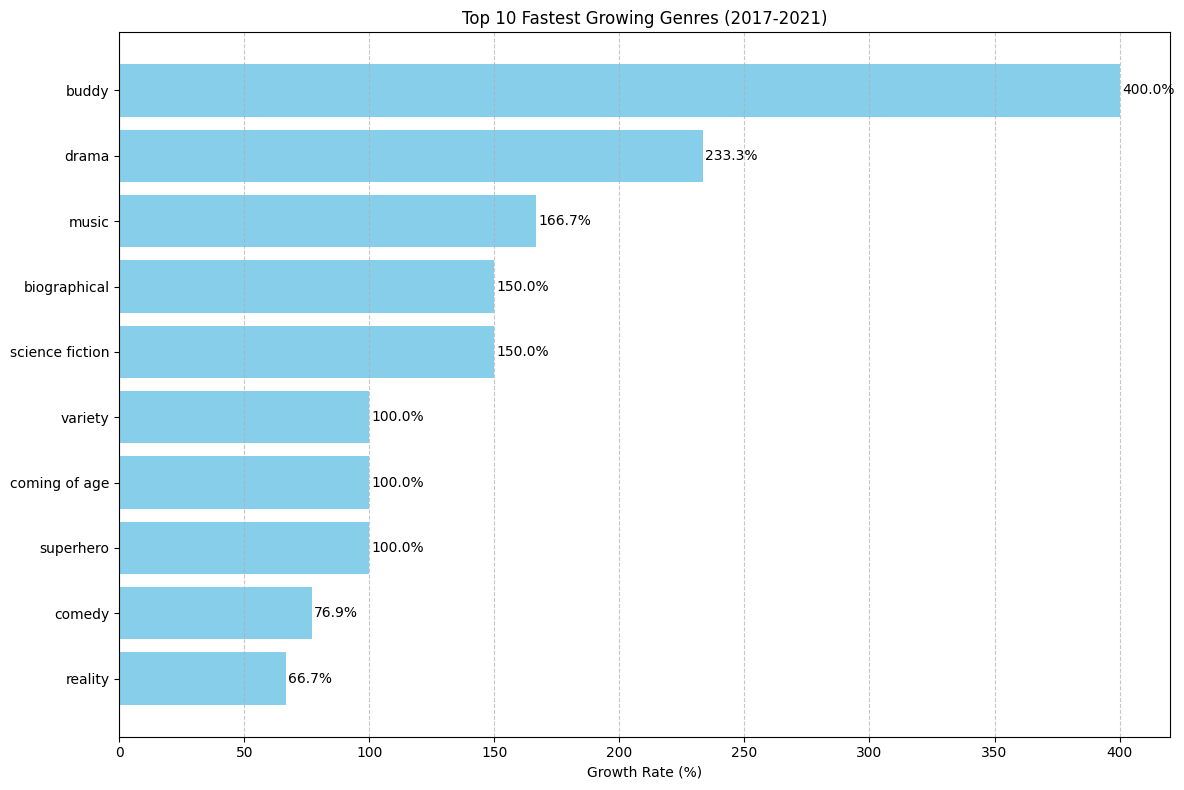


Detailed Growth Analysis (2017-2021):
--------------------------------------------------
reality:
  2017: 3 contents
  2021: 5 contents
  Growth Rate: 66.7%
--------------------------------------------------
comedy:
  2017: 13 contents
  2021: 23 contents
  Growth Rate: 76.9%
--------------------------------------------------
superhero:
  2017: 1 contents
  2021: 2 contents
  Growth Rate: 100.0%
--------------------------------------------------
coming of age:
  2017: 5 contents
  2021: 10 contents
  Growth Rate: 100.0%
--------------------------------------------------
variety:
  2017: 1 contents
  2021: 2 contents
  Growth Rate: 100.0%
--------------------------------------------------
science fiction:
  2017: 4 contents
  2021: 10 contents
  Growth Rate: 150.0%
--------------------------------------------------
biographical:
  2017: 2 contents
  2021: 5 contents
  Growth Rate: 150.0%
--------------------------------------------------
music:
  2017: 3 contents
  2021: 8 contents
  G

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_genre_growth(genre_year_counts, top_n=10):
    """
    최근 5년간의 장르별 성장률을 계산하고 시각화하는 함수

    Parameters:
    genre_year_counts: 장르별 연도별 제작 수 데이터
    top_n: 표시할 상위 성장률 장르 수 (기본값: 10)
    """
    # 최근 5년 기간 구하기
    all_years = sorted(list(genre_year_counts[list(genre_year_counts.keys())[0]].index))
    start_year = all_years[-5]  # 5년 전
    end_year = all_years[-1]    # 가장 최근 년도

    # 각 장르별 성장률 계산
    growth_rates = {}
    for genre in genre_year_counts.keys():
        start_count = genre_year_counts[genre].get(start_year, 0)
        end_count = genre_year_counts[genre].get(end_year, 0)

        # 시작 년도의 콘텐츠 수가 0이 아닌 경우에만 성장률 계산
        if start_count > 0:
            growth_rate = ((end_count - start_count) / start_count) * 100
            growth_rates[genre] = growth_rate

    # 성장률 기준으로 정렬
    sorted_growth_rates = pd.Series(growth_rates).sort_values(ascending=True)

    # 시각화
    plt.figure(figsize=(12, 8))

    # 막대 그래프 생성
    bars = plt.barh(range(len(sorted_growth_rates[-top_n:])),
                    sorted_growth_rates[-top_n:].values,
                    color='skyblue')

    # 축 레이블과 제목 설정
    plt.yticks(range(len(sorted_growth_rates[-top_n:])),
              sorted_growth_rates[-top_n:].index)
    plt.xlabel('Growth Rate (%)')
    plt.title(f'Top {top_n} Fastest Growing Genres ({start_year}-{end_year})')

    # 성장률 값 표시
    for i, v in enumerate(sorted_growth_rates[-top_n:]):
        plt.text(v + 1, i, f'{v:.1f}%', va='center')

    # 그리드 추가
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # 레이아웃 조정
    plt.tight_layout()

    plt.show()

    # 상세 데이터 출력
    print(f"\nDetailed Growth Analysis ({start_year}-{end_year}):")
    print("-" * 50)
    for genre in sorted_growth_rates[-top_n:].index:
        start_count = genre_year_counts[genre].get(start_year, 0)
        end_count = genre_year_counts[genre].get(end_year, 0)
        growth = sorted_growth_rates[genre]
        print(f"{genre}:")
        print(f"  {start_year}: {start_count} contents")
        print(f"  {end_year}: {end_count} contents")
        print(f"  Growth Rate: {growth:.1f}%")
        print("-" * 50)

    return sorted_growth_rates

# 사용 예시
growth_analysis = analyze_genre_growth(genre_year_counts, top_n=10)